In [ ]:
!wget 'https://s92vla.storage.yandex.net/rdisk/761710e745c5469b08b1a4b4f85b4421e3fb406730428454d7c4f049cfcb6da5/60bcab0b/ftRxSIsoXDYVYxJNhbHEOmhhRJAEEMpkrAHgQuEgquxrXBVJyfRRyALOzaVAaTdAzIp2ehUnWbYxx7NFA2W9Hw==?uid=0&filename=hackpromo_dataset.zip&disposition=attachment&hash=Ng5Q5LHIBXrec0YwH%2BBGn6fBTgQC%2BW/UIb8S4p5Y3lelx39wnbcKktkZftkvzHZWq/J6bpmRyOJonT3VoXnDag%3D%3D&limit=0&content_type=application%2Fzip&owner_uid=208103288&fsize=822296848&hid=8b836285dd4dfec28fe5fd5b6e0a8500&media_type=compressed&tknv=v2&rtoken=0jqtz1jbsAva&force_default=no&ycrid=na-01944591f8ce6766556c68b6de1abed7-downloader22f&ts=5c416d8e898c0&s=567cda5983508ce4f21757c41be6c4bb47616212de2bb8595aac29ce051243f0&pb=U2FsdGVkX1_Hqa_lNfuWMuVPqmBpaJAZgkSQgttW8w_Tuju_u3Y1bLN62K5cKu4y75BSAkhPX7FzIrLQPPHh2m97rumDDQ5epqwcUQy9cUY' -O hackpromo_dataset.zip

--2021-06-06 07:02:43--  https://s92vla.storage.yandex.net/rdisk/761710e745c5469b08b1a4b4f85b4421e3fb406730428454d7c4f049cfcb6da5/60bcab0b/ftRxSIsoXDYVYxJNhbHEOmhhRJAEEMpkrAHgQuEgquxrXBVJyfRRyALOzaVAaTdAzIp2ehUnWbYxx7NFA2W9Hw==?uid=0&filename=hackpromo_dataset.zip&disposition=attachment&hash=Ng5Q5LHIBXrec0YwH%2BBGn6fBTgQC%2BW/UIb8S4p5Y3lelx39wnbcKktkZftkvzHZWq/J6bpmRyOJonT3VoXnDag%3D%3D&limit=0&content_type=application%2Fzip&owner_uid=208103288&fsize=822296848&hid=8b836285dd4dfec28fe5fd5b6e0a8500&media_type=compressed&tknv=v2&rtoken=0jqtz1jbsAva&force_default=no&ycrid=na-01944591f8ce6766556c68b6de1abed7-downloader22f&ts=5c416d8e898c0&s=567cda5983508ce4f21757c41be6c4bb47616212de2bb8595aac29ce051243f0&pb=U2FsdGVkX1_Hqa_lNfuWMuVPqmBpaJAZgkSQgttW8w_Tuju_u3Y1bLN62K5cKu4y75BSAkhPX7FzIrLQPPHh2m97rumDDQ5epqwcUQy9cUY
Resolving s92vla.storage.yandex.net (s92vla.storage.yandex.net)... 93.158.162.221, 2a02:6b8:c0e:363:0:41af:e158:a130
Connecting to s92vla.storage.yandex.net (s92vla.storage.yandex.

In [ ]:
!unzip -P lenta080LENTA hackpromo_dataset.zip 

Archive:  hackpromo_dataset.zip
   creating: Lenta hack/
  inflating: Lenta hack/20210518_uplift.csv  
  inflating: Lenta hack/20210518_hierarchy.csv  
  inflating: Lenta hack/20210521_sample_submission.csv  
  inflating: Lenta hack/20210518_checks.csv  
  inflating: Lenta hack/20210521_offers.csv  


In [ ]:
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from tqdm.notebook import tqdm

mpl.rcParams['figure.figsize'] = (20, 6)
plt.style.use('ggplot')

In [ ]:
checks = pd.read_csv('/content/Lenta hack/20210518_checks.csv', parse_dates=['day'])
offers = pd.read_csv('/content/Lenta hack/20210521_offers.csv', parse_dates=['start_date', 'end_date'])

In [ ]:
checks.head()

,client_id,day,shop_id,check_id,time,sku,promo_id,check_pos,num_sales,supplier_price,selling_price,region_name
0,d9da50b77962ad6401d0527db5b65b04,2019-12-30,25bbdcd06c32d477f7fa1c3e4a91b032,c0b3f9c2215f924e27a6039617999c60,07:28:39,b17c870027bb4a22e3aedb971bc00def,b3deb0286313f0b888c0eac49580cc23,1,5.0,133.40,249.45,152f1b77a32508570e2745daf9ce7aec
1,d9da50b77962ad6401d0527db5b65b04,2019-12-30,25bbdcd06c32d477f7fa1c3e4a91b032,c0b3f9c2215f924e27a6039617999c60,07:28:39,b9ef00e971d0fb459a765708efba70c0,680a96609351230ed00e1d1090371cbc,2,1.0,96.77,118.99,152f1b77a32508570e2745daf9ce7aec
2,d9da50b77962ad6401d0527db5b65b04,2019-12-30,25bbdcd06c32d477f7fa1c3e4a91b032,c0b3f9c2215f924e27a6039617999c60,07:28:39,b75147feae4cf8ec07fb5f2cef855def,7215ee9c7d9dc229d2921a40e899ec5f,5,2.0,2.34,7.58,152f1b77a32508570e2745daf9ce7aec
3,d9da50b77962ad6401d0527db5b65b04,2019-12-30,25bbdcd06c32d477f7fa1c3e4a91b032,c0b3f9c2215f924e27a6039617999c60,07:28:39,b25e0d42165d246d23cbf4d3efcdf583,7215ee9c7d9dc229d2921a40e899ec5f,4,1.0,23.59,39.99,152f1b77a32508570e2745daf9ce7aec
4,d9da50b77962ad6401d0527db5b65b04,2019-12-30,25bbdcd06c32d477f7fa1c3e4a91b032,c0b3f9c2215f924e27a6039617999c60,07:28:39,a537d2eef30d47f9b11d655421ca93fb,05c93d4fa9bdbe70b5d2204ce9548ca9,3,1.0,24.02,39.99,152f1b77a32508570e2745daf9ce7aec


In [ ]:
checks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21479259 entries, 0 to 21479258
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   client_id       object        
 1   day             datetime64[ns]
 2   shop_id         object        
 3   check_id        object        
 4   time            object        
 5   sku             object        
 6   promo_id        object        
 7   check_pos       int64         
 8   num_sales       float64       
 9   supplier_price  float64       
 10  selling_price   float64       
 11  region_name     object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 1.9+ GB


In [ ]:
offers.head()

,Promo_type,Offer_ID,sku,start_date,end_date,train_test_group,days,dayweek
0,Facades,F26,71c770923102af052f64c6036c9dd590,2020-02-13,2020-02-19,train,7,3
1,Facades,F2,e87788b585ead792a4d40f7de18f2f76,2020-01-02,2020-01-08,train,7,3
2,Facades,F9,5ae92b5e465d630285677e80b43fe5f7,2020-01-16,2020-01-22,train,7,3
3,Facades,F45,0790b472112a765339f0e5c3f66816ee,2020-03-19,2020-03-25,train,7,3
4,Facades,F191,e87788b585ead792a4d40f7de18f2f76,2020-11-12,2020-11-18,test,7,3


In [ ]:
offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9776 entries, 0 to 9775
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Promo_type        9776 non-null   object        
 1   Offer_ID          9776 non-null   object        
 2   sku               9776 non-null   object        
 3   start_date        9776 non-null   datetime64[ns]
 4   end_date          9776 non-null   datetime64[ns]
 5   train_test_group  9776 non-null   object        
 6   days              9776 non-null   int64         
 7   dayweek           9776 non-null   int64         
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 611.1+ KB


In [ ]:
offers['days'] = (offers.end_date - offers.start_date).dt.days + 1
offers['dayweek'] = offers.start_date.dt.dayofweek

Типы промо

In [ ]:
offers.Promo_type.value_counts()

Seasonal      3455
Biweekly      2998
Facades       2513
Billboards     810
Name: Promo_type, dtype: int64

Дни, в которые начинаются акции

In [ ]:
offers.dayweek.value_counts()

3    6256
1    3019
0     399
4      79
2      23
Name: dayweek, dtype: int64

In [ ]:
offers.days.value_counts()

14    5109
7     2748
21    1009
29     242
28     206
22     137
15     123
36      51
20      41
11      38
42      29
8       23
43       8
49       5
6        4
4        2
10       1
Name: days, dtype: int64

In [ ]:
def get_profit(checks, sku, start, end):
    check_ids = checks[(checks.sku == sku) & (checks.day.between(start, end))].check_id
    check_pred = checks[checks.check_id.isin(check_ids)]
    profit = check_pred.selling_price.sum()
    return profit

In [ ]:
def get_intervals(start_date, end_date, days):
  pred_end = start_date - pd.Timedelta(days=1)
  pred_start = pred_end - pd.Timedelta(days=days)

  past_start = end_date + pd.Timedelta(days=1)
  past_end = past_start + pd.Timedelta(days=days-1)

  return (pred_start, pred_end), (past_start, past_end)

In [ ]:
def get_profits(checks, sku, start_date, end_date, days):
    (pred_start, pred_end), (past_start, past_end) = get_intervals(start_date, end_date, days)
    
    profit = get_profit(checks, sku, start_date, end_date)
    pred_profit = get_profit(checks, sku, pred_start, pred_end)
    past_profit = get_profit(checks, sku, past_start, past_end)

    return pred_profit, profit, past_profit

In [ ]:
def bar(*args, **kwds):
    plt.bar(range(len(args[0])), *args, **kwds)

In [ ]:
def is_promo_checks(checks, offer):
    return reduce(lambda x, y: x| y,
        (checks.day.between(a, b) 
            for (a, b) in zip(offer['start_date'],
                              offer['end_date'])))
    
def calc_revenue(x):
    return x.selling_price.sum() / x.day.nunique()

### Гало

Топ 100 самых частых товаров на акции

In [ ]:
offers_top100 = offers[offers.sku.isin(offers.sku.value_counts()[:100].index) & offers.train_test_group.eq('train')]
checks_top100 = checks[checks.sku.isin(offers_top100.sku.unique())]

In [ ]:
profits = []
for _, row in tqdm(offers_top100.iterrows(), total=len(offers_top100)):
    profits.append(get_profits(checks_top100, row.sku, row.start_date, row.end_date, row.days))

In [ ]:
profits = pd.DataFrame(profits, columns=['pred_profit', 'profit', 'past_profit'])

In [ ]:
means_curr = profits.groupby(offers_top100.sku).apply(lambda x: (x.profit.mean() / (x.pred_profit.mean() + 1e-2) - 1))
means_past = profits.groupby(offers_top100.sku).apply(lambda x: (x.past_profit.mean() / (x.pred_profit.mean() + 1e-2) - 1))

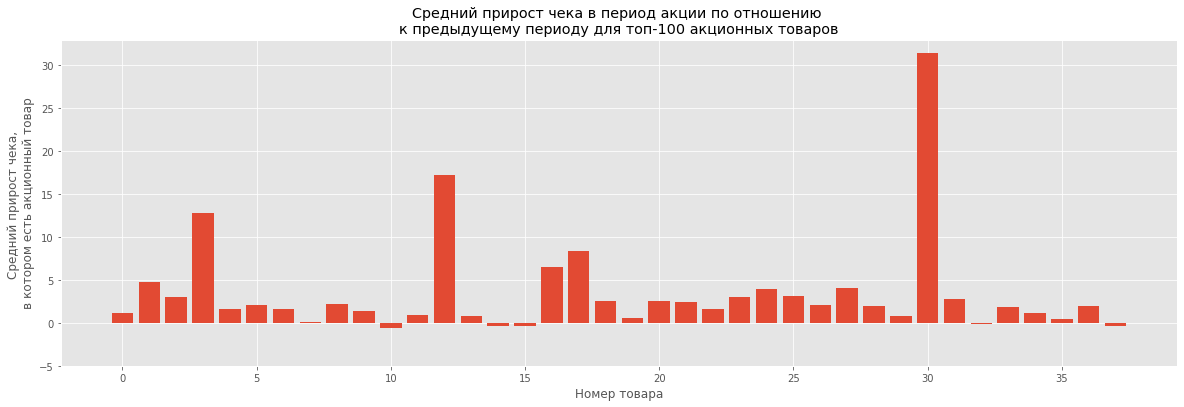

In [ ]:
bar(means_curr)
plt.ylim(-5, 33)
plt.xlabel('Номер товара')
plt.ylabel('Средний прирост чека, \nв котором есть акционный товар')
plt.title('Средний прирост чека в период акции по отношению \nк предыдущему периоду для топ-100 акционных товаров');

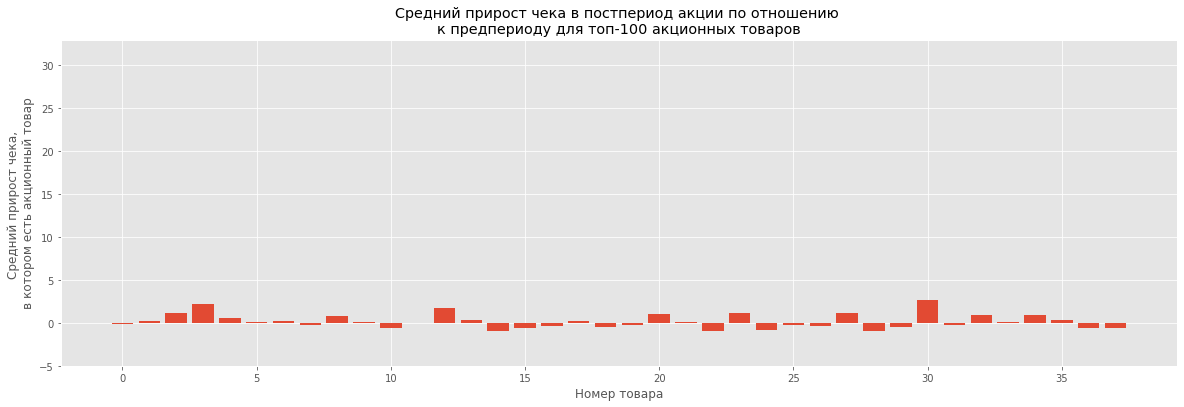

In [ ]:
bar(means_past)
plt.ylim(-5, 33)
plt.xlabel('Номер товара')
plt.ylabel('Средний прирост чека, \nв котором есть акционный товар')
plt.title('Средний прирост чека в постпериод акции по отношению \nк предпериоду для топ-100 акционных товаров');

### Эффективность промо на товар

In [ ]:
from functools import reduce

means = []
for sku in tqdm(offers_top100.sku.unique()):
    spam_offer = offers[offers.sku == sku]
    checks_sku = checks_top100[checks_top100.sku == sku]
    checks_sku_isPromo = reduce(lambda x, y: x| y,
        (checks_sku.day.between(a, b) 
            for (a, b) in zip(spam_offer['start_date'],
                              spam_offer['end_date'])))
    
    checks_sku_promo = checks_sku[checks_sku_isPromo]
    checks_sku_nopromo = checks_sku[~checks_sku_isPromo]
    
    mean_promo = (checks_sku_promo.selling_price).sum() / checks_sku_promo.day.nunique()
    mean_nopromo = (checks_sku_nopromo.selling_price).sum() / checks_sku_nopromo.day.nunique()
    means.append([mean_promo, mean_nopromo])

In [ ]:
means = pd.DataFrame(means, columns=['mean_promo', 'mean_nopromo'])

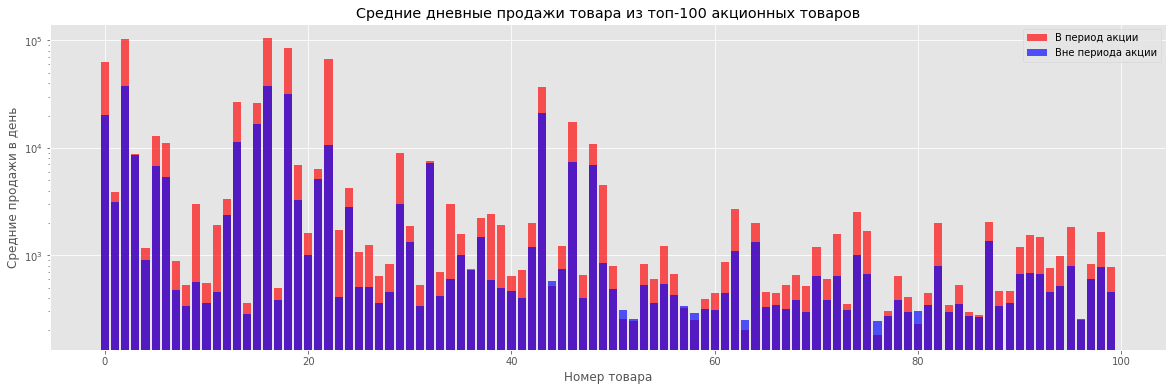

In [ ]:
bar(means.mean_promo, label='В период акции', alpha=0.66, color='r')
bar(means.mean_nopromo, label='Вне периода акции', alpha=0.66, color='b')
plt.yscale('log')
plt.title('Средние дневные продажи товара из топ-100 акционных товаров')
plt.xlabel('Номер товара')
plt.ylabel('Средние продажи в день')
plt.legend()

Text(0, 0.5, 'Средний прирост продаж')

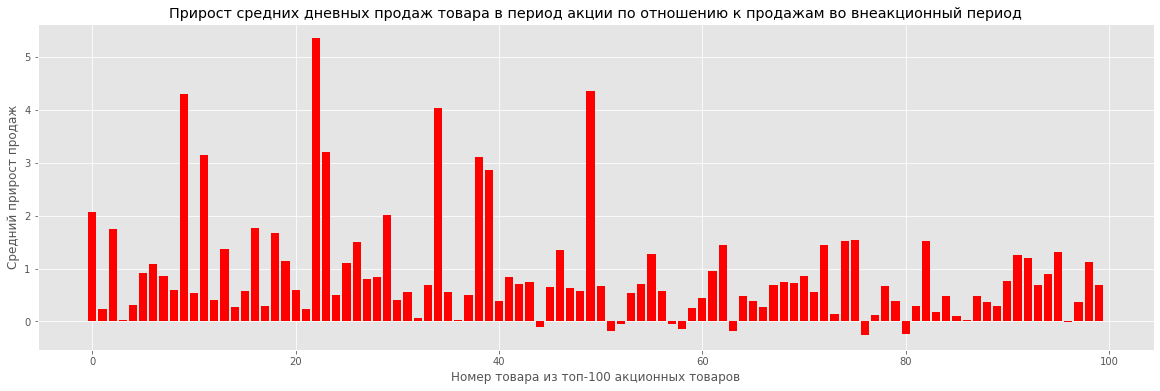

In [ ]:
bar(means.mean_promo / means.mean_nopromo - 1, label='Вне периода акции', color='r')
plt.title('Прирост средних дневных продаж товара в период акции по отношению к продажам во внеакционный период')
plt.xlabel('Номер товара из топ-100 акционных товаров')
plt.ylabel('Средний прирост продаж')

In [ ]:
from functools import reduce

means = []
for sku in tqdm(offers_top100.sku.unique()):
    spam_offer = offers[offers.sku == sku]
    checks_sku = checks_top100[checks_top100.sku == sku]
    checks_sku_isPromo = reduce(lambda x, y: x| y,
        (checks_sku.day.between(a, b) 
            for (a, b) in zip(spam_offer['start_date'],
                              spam_offer['end_date'])))
    
    checks_sku_promo = checks_sku[checks_sku_isPromo]
    checks_sku_nopromo = checks_sku[~checks_sku_isPromo]
    
    mean_promo = (checks_sku_promo.selling_price - checks_sku_promo.supplier_price).sum() / checks_sku_promo.day.nunique()
    mean_nopromo = (checks_sku_nopromo.selling_price - checks_sku_nopromo.supplier_price).sum() / checks_sku_nopromo.day.nunique()
    means.append([mean_promo, mean_nopromo])
means = pd.DataFrame(means, columns=['mean_promo', 'mean_nopromo'])

Text(0, 0.5, 'Средняя дневная прибыль')

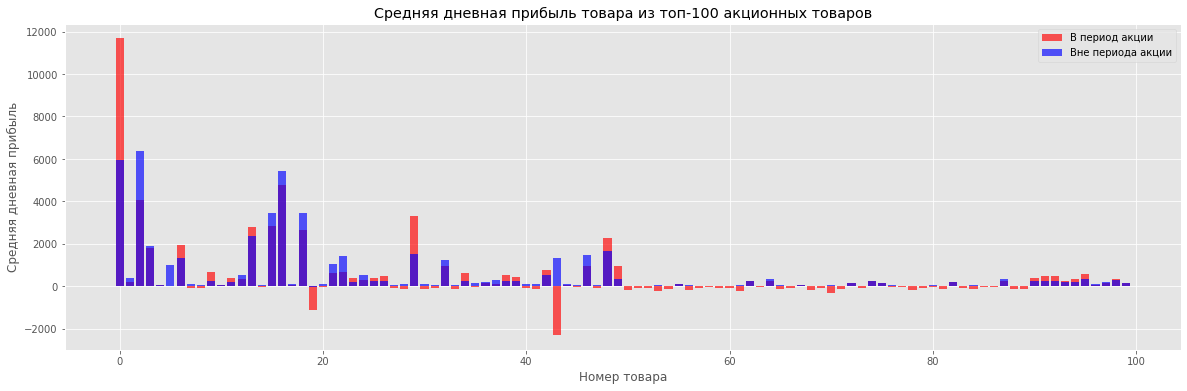

In [ ]:
bar(means.mean_promo, label='В период акции', alpha=0.66, color='r')
bar(means.mean_nopromo, label='Вне периода акции', alpha=0.66, color='b')
plt.legend()
plt.title('Средняя дневная прибыль товара из топ-100 акционных товаров')
plt.xlabel('Номер товара')
plt.ylabel('Средняя дневная прибыль')

### Оценка каннибализации

In [ ]:
sku_cnts = checks.sku.value_counts()
checks_top100 = checks[checks.sku.isin(sku_cnts[:100].index)]

In [ ]:
from collections import Counter
from itertools import combinations

counter = Counter()

vals = checks_top100.groupby('check_id').sku.apply(set).values

for val in tqdm(vals):
    combs = combinations(val, 2)
    combs = map(frozenset, combs)
    counter.update(combs)

In [ ]:
df = pd.DataFrame(list(counter.keys()), columns=['item1', 'item2'])
df['cnt'] = counter.values()
df.sort_values('cnt', inplace=True)

In [ ]:
offers_top100 = offers[offers.sku.isin(sku_cnts[:100].index) & offers.train_test_group.eq('train')]

In [ ]:
means = []
for sku in tqdm(offers_top100.sku.unique()):
    spam_offer = offers[offers.sku == sku]
    cross_goods = df[df.item1.eq(sku) | df.item2.eq(sku)][['item1', 'item2']]

    replac_goods = cross_goods.head(5)
    compl_goods = cross_goods.tail(5)

    replac_goods = np.unique(replac_goods.values.ravel())
    compl_goods = np.unique(compl_goods.values.ravel())

    checks_replac = checks_top100[checks_top100.sku.isin(replac_goods)]
    checks_compl = checks_top100[checks_top100.sku.isin(compl_goods)]
        
    checks_replac_isPromo = is_promo_checks(checks_replac, spam_offer)
    checks_compl_isPromo = is_promo_checks(checks_compl, spam_offer)

    checks_replac_promo = checks_replac[checks_replac_isPromo]
    checks_replac_nopromo = checks_replac[~checks_replac_isPromo]
    checks_compl_promo = checks_compl[checks_compl_isPromo]
    checks_compl_nopromo = checks_compl[~checks_compl_isPromo]

    mean_replac_promo = calc_revenue(checks_replac_promo)
    mean_replac_nopromo = calc_revenue(checks_replac_nopromo)
    mean_compl_promo = calc_revenue(checks_compl_promo)
    mean_compl_nopromo = calc_revenue(checks_compl_nopromo)

    means.append([mean_replac_promo, mean_replac_nopromo, mean_compl_promo, mean_compl_nopromo])

means = pd.DataFrame(means, columns=['mean_replac_promo', 'mean_replac_nopromo', 'mean_compl_promo', 'mean_compl_nopromo'])

Text(0, 0.5, 'Средний прирост продаж')

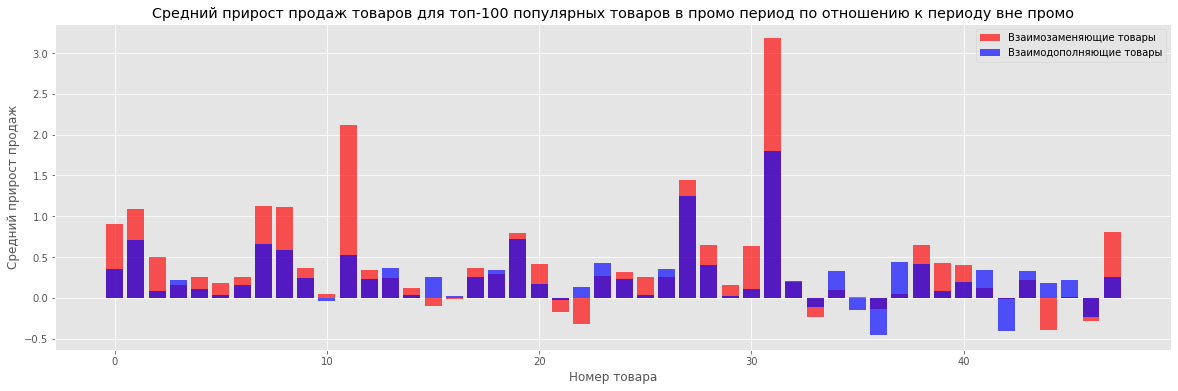

In [ ]:
bar(means.mean_replac_promo / means.mean_replac_nopromo - 1, label='Взаимозаменяющие товары', alpha=0.66, color='r')
bar(means.mean_compl_promo / means.mean_compl_nopromo - 1, label='Взаимодополняющие товары', alpha=0.66, color='b')
plt.legend()
plt.title('Средний прирост продаж товаров для топ-100 популярных товаров в промо период по отношению к периоду вне промо')
plt.xlabel('Номер товара')
plt.ylabel('Средний прирост продаж')

### Оценка частотности промо

In [ ]:
offers_cnt = offers.sku.value_counts()
checks_top100 = checks[checks.sku.isin(offers_cnt.index)]

In [ ]:
means = []
for sku in tqdm(offers_cnt[:100].index):
    spam_offer = offers[offers.sku == sku]
    checks_sku = checks_top100[checks_top100.sku == sku]
    checks_sku_isPromo = is_promo_checks(checks_sku, spam_offer)

    checks_sku_promo = checks_sku[checks_sku_isPromo]
    checks_sku_nopromo = checks_sku[~checks_sku_isPromo]
    
    mean_promo = calc_revenue(checks_sku_promo)
    mean_nopromo = calc_revenue(checks_sku_nopromo)
    means.append([mean_promo, mean_nopromo])
    
means = pd.DataFrame(means, columns=['mean_promo', 'mean_nopromo'])

Text(0, 0.5, 'Средний прирост продаж товара')

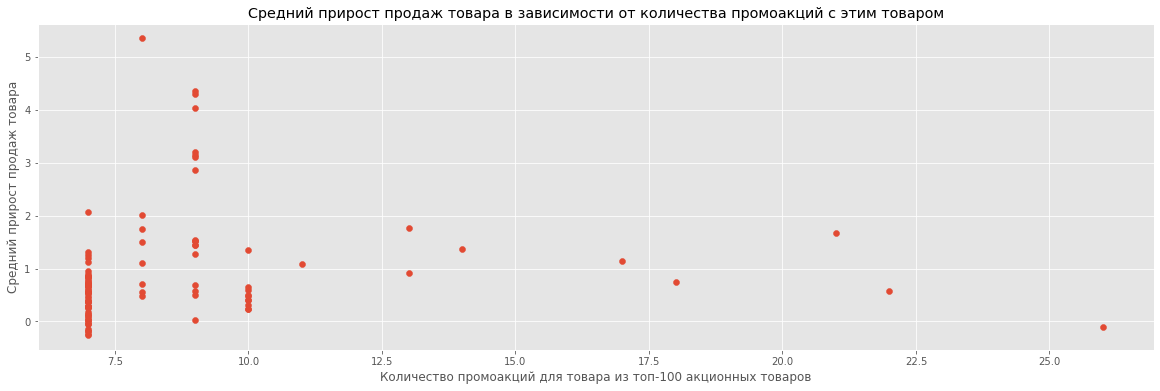

In [ ]:
plt.scatter(offers_cnt[:100], means.mean_promo / means.mean_nopromo - 1)
plt.title('Средний прирост продаж товара в зависимости от количества промоакций с этим товаром')
plt.xlabel('Количество промоакций для товара из топ-100 акционных товаров')
plt.ylabel('Средний прирост продаж товара')